In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1. 模擬版資料做 SVM

In [2]:
x = np.array([[6, 6], [10, 8], [3, 7], [8, 7]])

In [4]:
x[:, 0]

array([ 6, 10,  3,  8])

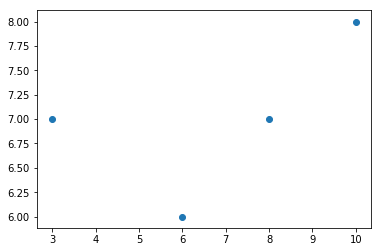

In [5]:
plt.scatter(x[:,0], x[:,1])

In [6]:
y = np.array([1, 2, 1, 2])

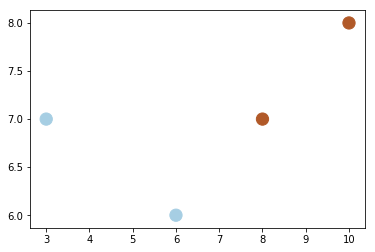

In [11]:
plt.scatter(x[:,0], x[:,1], c=y, cmap='Paired', s=150)

### Step 1. 打開函數學習機

In [12]:
from sklearn.svm import SVC

In [15]:
clf = SVC(gamma='auto')

### Step 2. 學習

In [16]:
clf.fit(x, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Step 3. 預測

In [18]:
y_predict = clf.predict(x)

In [19]:
y_predict

array([1, 2, 1, 2])

In [20]:
y

array([1, 2, 1, 2])

### 視覺化結果之一

In [23]:
xr = np.random.rand(100)*7 + 3
yr = np.random.rand(100)*2 + 6

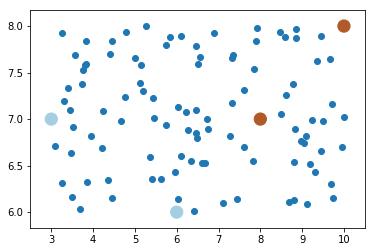

In [25]:
plt.scatter(xr, yr)
plt.scatter(x[:,0], x[:,1], c=y, cmap='Paired', s=150)

In [27]:
print('X', xr[:5])
print('Y', yr[:5])

X [6.03971986 7.83743566 3.45525746 5.12274784 3.56026098]
Y [6.13859154 7.53946166 7.09597354 7.38940389 7.68710577]


#### 資料整理

原本

$$x_r = [x_1, x_2, x_3, ...]$$

$$y_r = [y_1, y_2, y_3, ...]$$

我們希望變成:

$$[[x_1, y_1], [x_2, y_2], [x_3, y_3],...]$$

可以用

    np.c_[xr, yr]
    
達成!

In [29]:
X = np.c_[xr, yr]

In [30]:
Y = clf.predict(X)

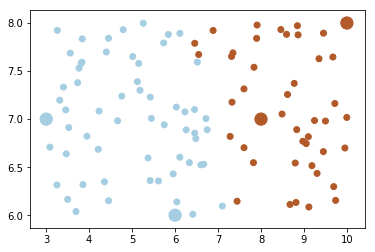

In [32]:
plt.scatter(x[:,0], x[:,1], c=y, cmap='Paired', s=150)
plt.scatter(X[:,0], X[:,1], c=Y, cmap='Paired')

### 視覺化結果之二

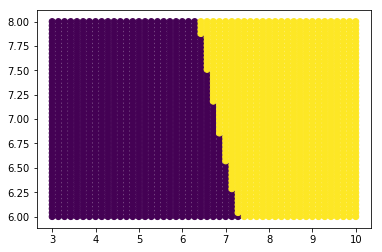

In [45]:
x_list = np.linspace(3, 10, 50)
y_list = np.linspace(6, 8, 50)
X, Y = np.meshgrid(x_list, y_list)
P = np.c_[X.ravel(), Y.ravel()]
C = clf.predict(P)
plt.scatter(P[:,0], P[:,1], c=C)

In [44]:
X.ravel()

array([ 3.        ,  3.14285714,  3.28571429, ...,  9.71428571,
        9.85714286, 10.        ])

### 插播: contour 用法

In [46]:
xL = np.array([1,2,3,4])
yL = np.array([5,6,7,8])
X, Y = np.meshgrid(xL, yL)

In [47]:
X

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [48]:
Y

array([[5, 5, 5, 5],
       [6, 6, 6, 6],
       [7, 7, 7, 7],
       [8, 8, 8, 8]])

In [50]:
Z = np.random.randint(1, 3, (4,4))

In [51]:
Z

array([[1, 1, 2, 2],
       [2, 2, 2, 2],
       [1, 1, 1, 2],
       [2, 2, 2, 1]])

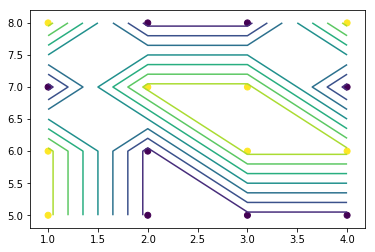

In [58]:
Z = np.random.randint(1, 3, (4,4))
plt.contour(X, Y, Z)
plt.scatter(X.ravel(), Y.ravel(), c=Z.ravel())

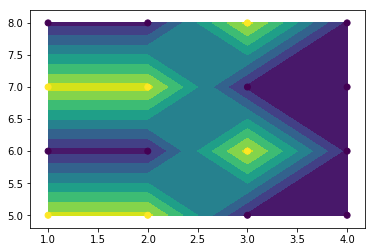

In [62]:
Z = np.random.randint(1, 3, (4,4))
plt.contourf(X, Y, Z)
plt.scatter(X.ravel(), Y.ravel(), c=Z.ravel())

### 視覺化終極版

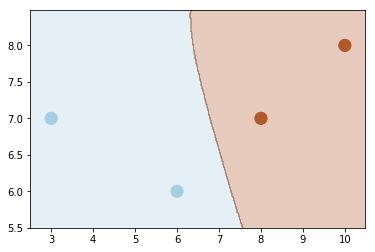

In [72]:
x_arr = np.arange(2.5, 10.5, 0.02)
y_arr = np.arange(5.5, 8.5, 0.02)
X, Y = np.meshgrid(x_arr, y_arr)
P = np.c_[X.ravel(), Y.ravel()]
z = clf.predict(P)
Z = z.reshape(X.shape)

plt.contourf(X, Y, Z, cmap='Paired', alpha=0.3)
plt.scatter(x[:,0], x[:,1], c=y, cmap='Paired', s=150)

In [66]:
X.shape

(100, 350)

## 2. 鳶尾花數據庫

In [73]:
from sklearn.datasets import load_iris

In [74]:
iris = load_iris()

In [76]:
# print(iris.DESCR)

In [77]:
x = iris.data
y = iris.target

In [78]:
x[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [79]:
y[:5]

array([0, 0, 0, 0, 0])

In [81]:
X = x[:, :2]

In [82]:
Y = y

In [83]:
len(X)

150

### 區分訓練資料、測試資料

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                   test_size = 0.2,
                                                   random_state = 0)

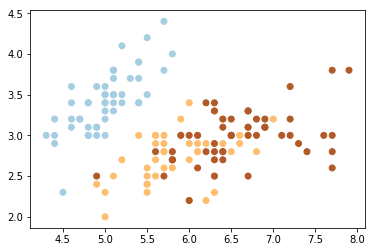

In [86]:
plt.scatter(X[:,0], X[:,1], c=Y, cmap='Paired')

### Step 1. 開一台函數學習機

In [88]:
clf = SVC(gamma='auto')

### Step 2. 訓練

In [89]:
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Step 3. 預測

In [90]:
y_predict = clf.predict(x_test)

In [91]:
y_predict

array([1, 1, 0, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 1, 0])

In [92]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [93]:
y_predict - y_test

array([-1,  0,  0,  0,  0,  0,  0,  1,  1,  1, -1,  1,  1,  1,  1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  1,  0,  0])

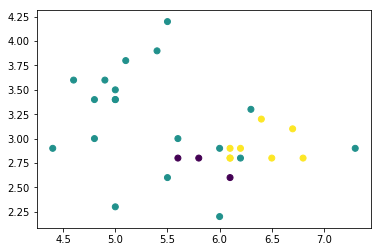

In [94]:
plt.scatter(x_test[:,0], x_test[:,1], c=y_predict-y_test)

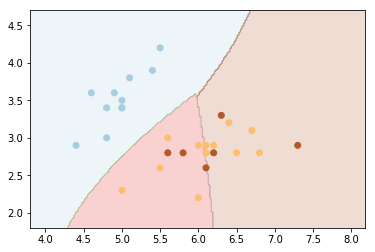

In [99]:
x0 = np.arange(3.8, 8.2, 0.02)
y0 = np.arange(1.8, 4.7, 0.02)

xm, ym = np.meshgrid(x0, y0)
P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)

Z = z.reshape(xm.shape)
plt.contourf(xm, ym, Z, cmap='Paired', alpha=0.2)

plt.scatter(x_test[:,0], x_test[:,1], cmap='Paired',
           c=y_test)

### [問題]

試試看做鳶尾花預測時, 你可不可以想辦法得到更好的結果。